In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import plotly.express as px

In [2]:
angus = pd.read_csv('merged_data.csv')
angus.head()

,Cow ID,Common Type of Seed,Body Weight (kg),Daily Hay Dry matter (kg),Daily Hay Intake Fresh (kg),dry matter,net energy for lactation of hay
0,1,alfalfa,450,25,50,0.87,1.3
1,2,timothy,480,27,54,0.87,0.6
2,3,clover,470,26,52,0.20,1.3
3,4,alfalfa,460,24,48,0.87,1.3
4,5,timothy,500,28,56,0.87,0.6


In [4]:
angus = angus.set_index('Cow ID')
angus.head()

,Common Type of Seed,Body Weight (kg),Daily Hay Dry matter (kg),Daily Hay Intake Fresh (kg),dry matter,net energy for lactation of hay
Cow ID,,,,,,
1,alfalfa,450,25,50,0.87,1.3
2,timothy,480,27,54,0.87,0.6
3,clover,470,26,52,0.20,1.3
4,alfalfa,460,24,48,0.87,1.3
5,timothy,500,28,56,0.87,0.6


In [5]:
angus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 1 to 60
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Common Type of Seed              60 non-null     object 
 1   Body Weight (kg)                 60 non-null     int64  
 2   Daily Hay Dry matter (kg)        60 non-null     int64  
 3   Daily Hay Intake Fresh (kg)      60 non-null     int64  
 4   dry matter                       60 non-null     float64
 5   net energy for lactation of hay  60 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 3.3+ KB


In [6]:
angus.shape

(60, 6)

In [7]:
angus.describe()

,Body Weight (kg),Daily Hay Dry matter (kg),Daily Hay Intake Fresh (kg),dry matter,net energy for lactation of hay
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,476.916667,27.100000,54.200000,0.646667,1.066667
std,13.119130,1.674333,3.348665,0.318506,0.332768
min,450.000000,24.000000,48.000000,0.200000,0.600000
25%,470.000000,26.000000,52.000000,0.200000,0.600000
50%,475.000000,27.000000,54.000000,0.870000,1.300000
75%,485.000000,28.000000,56.000000,0.870000,1.300000
max,500.000000,30.000000,60.000000,0.870000,1.300000


In [8]:
angus.isnull().sum()

,0
Common Type of Seed,0
Body Weight (kg),0
Daily Hay Dry matter (kg),0
Daily Hay Intake Fresh (kg),0
dry matter,0
net energy for lactation of hay,0


In [9]:
angus.duplicated().sum()

29

In [10]:
angus.duplicated()

,0
Cow ID,
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [11]:
duplicate_rows = angus[angus.duplicated(keep=False)]  # Show all duplicate rows
duplicate_rows

,Common Type of Seed,Body Weight (kg),Daily Hay Dry matter (kg),Daily Hay Intake Fresh (kg),dry matter,net energy for lactation of hay
Cow ID,,,,,,
2,timothy,480,27,54,0.87,0.6
3,clover,470,26,52,0.20,1.3
6,clover,475,27,54,0.20,1.3
8,timothy,490,29,58,0.87,0.6
9,clover,485,28,56,0.20,1.3
13,alfalfa,465,25,50,0.87,1.3
15,clover,490,29,58,0.20,1.3
16,alfalfa,455,24,48,0.87,1.3
17,timothy,500,30,60,0.87,0.6


In [12]:
fig = px.bar(angus, x='Common Type of Seed', title='Distribution of Seed Types', width=600, height=500)
fig.update_layout(xaxis_title='Common Type of Seed', yaxis_title='Count')
fig.show()

In [13]:
for col in angus.select_dtypes(include=np.number).columns:
    # Calculate the IQR and bounds
    Q1 = angus[col].quantile(0.25)
    Q3 = angus[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = angus[(angus[col] < lower_bound) | (angus[col] > upper_bound)]

    # Print the outliers
    print(f"Outliers in {col}:")
    print(outliers)
    print("\n")

Outliers in Body Weight (kg):
Empty DataFrame
Columns: [Common Type of Seed, Body Weight (kg), Daily Hay Dry matter (kg), Daily Hay Intake Fresh (kg), dry matter, net energy for lactation of hay]
Index: []


Outliers in Daily Hay Dry matter (kg):
Empty DataFrame
Columns: [Common Type of Seed, Body Weight (kg), Daily Hay Dry matter (kg), Daily Hay Intake Fresh (kg), dry matter, net energy for lactation of hay]
Index: []


Outliers in Daily Hay Intake Fresh (kg):
Empty DataFrame
Columns: [Common Type of Seed, Body Weight (kg), Daily Hay Dry matter (kg), Daily Hay Intake Fresh (kg), dry matter, net energy for lactation of hay]
Index: []


Outliers in dry matter:
Empty DataFrame
Columns: [Common Type of Seed, Body Weight (kg), Daily Hay Dry matter (kg), Daily Hay Intake Fresh (kg), dry matter, net energy for lactation of hay]
Index: []


Outliers in net energy for lactation of hay:
Empty DataFrame
Columns: [Common Type of Seed, Body Weight (kg), Daily Hay Dry matter (kg), Daily Hay Intake 

In [14]:
for col in angus.select_dtypes(include=np.number).columns:
  fig = px.box(angus, x=col, title=f'Box Plot of {col}', width=600, height=500)
  fig.show()

In [15]:
for col in angus.columns:
  unique_values = angus[col].unique()
  print(f"Unique values in {col}:")
  print(unique_values)
  print("\n")

Unique values in Common Type of Seed:
['alfalfa' 'timothy' 'clover']


Unique values in Body Weight (kg):
[450 480 470 460 500 475 455 490 485 465]


Unique values in Daily Hay Dry matter (kg):
[25 27 26 24 28 29 30]


Unique values in Daily Hay Intake Fresh (kg):
[50 54 52 48 56 58 60]


Unique values in dry matter:
[0.87 0.2 ]


Unique values in net energy for lactation of hay:
[1.3 0.6]




In [16]:
fig = px.scatter(angus, x='Body Weight (kg)', y='Daily Hay Dry matter (kg)',
                 title='Body Weight vs. Daily Hay Dry Matter',
                 trendline='ols',width = 700, height=500 )
fig.show()

In [17]:
fig = px.scatter(angus, x='Body Weight (kg)', y='Daily Hay Intake Fresh (kg)',
                 title='Body Weight vs. Daily Hay Intake Fresh',
                 trendline='ols', width=700, height=600)
fig.show()

In [18]:
for col in angus.select_dtypes(include=np.number).columns:
    fig = px.box(angus, x='Common Type of Seed', y=col,
                 title=f'Distribution of {col} by Seed Type')
    fig.show()

In [19]:
numerical_cols = angus.select_dtypes(include=np.number).columns

In [20]:
fig = px.scatter_matrix(angus, dimensions=numerical_cols, color='Common Type of Seed',
                        title='Pair Plot with Categorical Variable',
                        width=1000, height=800)
fig.update_layout(margin=dict(l=100, r=100, b=100, t=100))
fig.show()

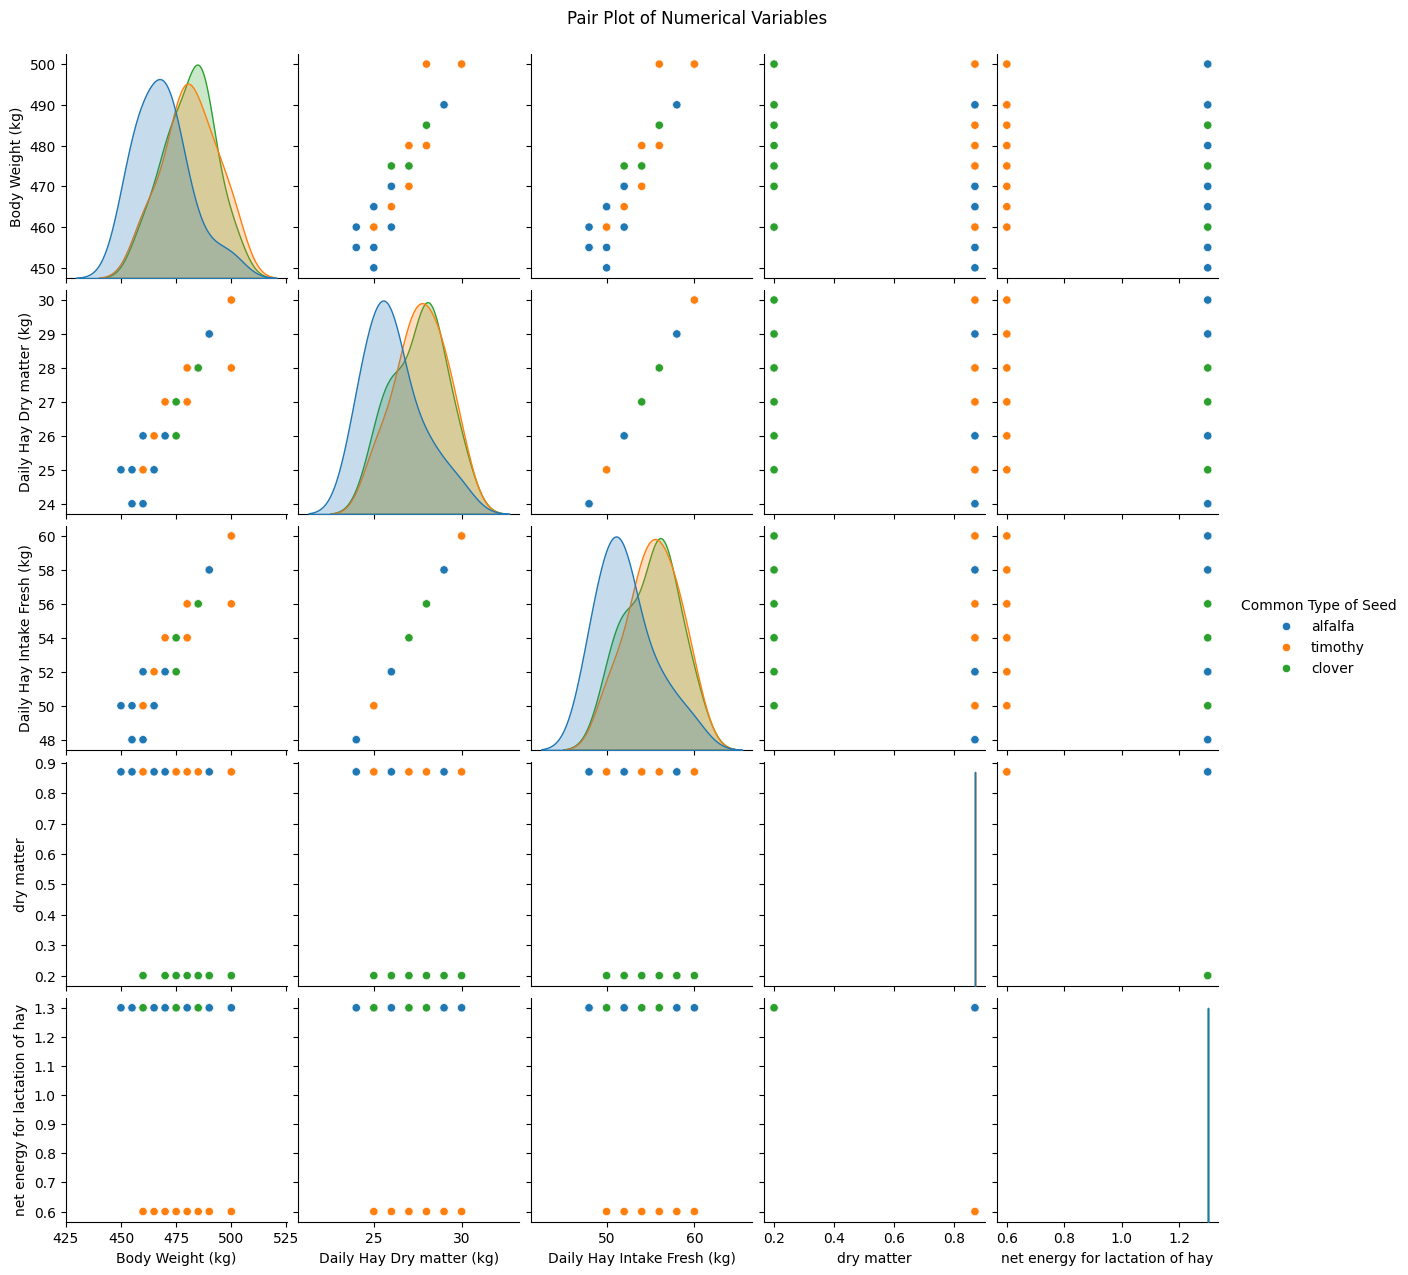

<Figure size 1000x1000 with 0 Axes>

In [21]:
pairplot = sns.pairplot(angus, hue='Common Type of Seed')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.figure(figsize=(10, 10))
plt.show()

In [22]:
numeric_features = [feature for feature in angus.columns if angus[feature].dtype != 'O']
catagorical_features = [feature for feature in angus.columns if angus[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(catagorical_features), catagorical_features))

We have 5 numerical features : ['Body Weight (kg)', 'Daily Hay Dry matter (kg)', 'Daily Hay Intake Fresh (kg)', 'dry matter', 'net energy for lactation of hay']

We have 1 categorical features : ['Common Type of Seed']


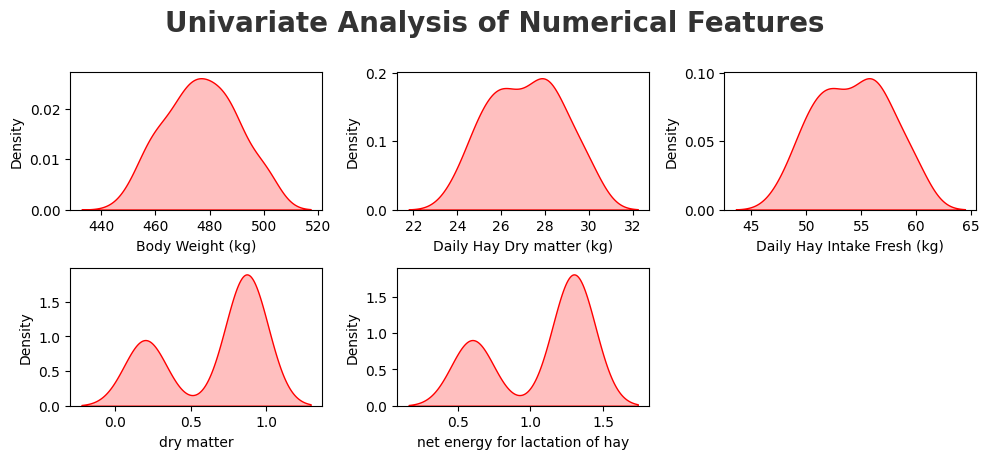

In [23]:
## Univariate analysis of Numerical features
plt.figure(figsize=(10, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=angus[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

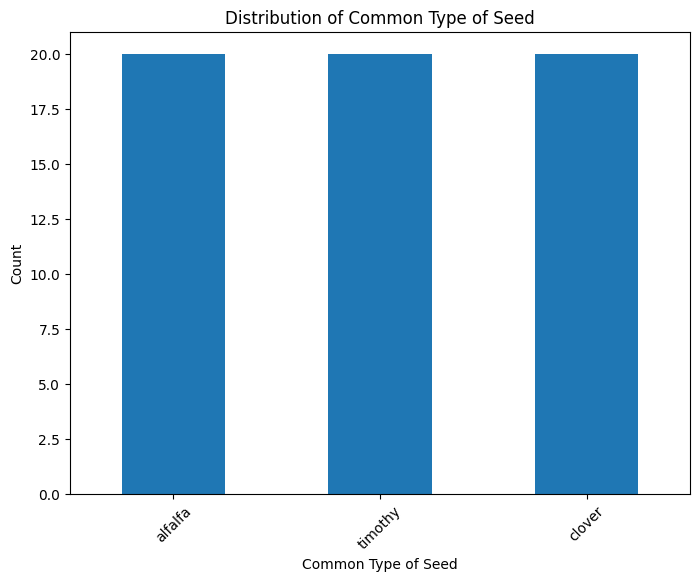

In [24]:
for col in catagorical_features:
    plt.figure(figsize=(8, 6))
    angus[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [25]:
angus.groupby('Common Type of Seed').describe()

Body Weight (kg)                                           \
                               count    mean        std    min     25%    50%   
Common Type of Seed                                                             
alfalfa                         20.0  468.75  12.447257  450.0  460.00  470.0   
clover                          20.0  480.75  11.271179  460.0  473.75  485.0   
timothy                         20.0  481.25  12.125983  460.0  475.00  480.0   

                                   Daily Hay Dry matter (kg)         ...  \
                        75%    max                     count   mean  ...   
Common Type of Seed                                                  ...   
alfalfa              475.00  500.0                      20.0  26.10  ...   
clover               486.25  500.0                      20.0  27.55  ...   
timothy              490.00  500.0                      20.0  27.65  ...   

                    dry matter       net energy for lactation of hay       \
                           75%   max                           count mean   
Common Type of Seed                                                         
alfalfa                   0.87  0.87                            20.0  1.3   
clover                    0.20  0.20                            20.0  1.3   
timothy                   0.87  0.87                            20.0  0.6   

                                                            
                              std  min  25%  50%  75%  max  
Common Type of Seed                                         
alfalfa              2.278130e-16  1.3  1.3  1.3  1.3  1.3  
clover               2.278130e-16  1.3  1.3  1.3  1.3  1.3  
timothy              1.139065e-16  0.6  0.6  0.6  0.6  0.6  

[3 rows x 40 columns]

In [26]:
angus.head()

,Common Type of Seed,Body Weight (kg),Daily Hay Dry matter (kg),Daily Hay Intake Fresh (kg),dry matter,net energy for lactation of hay
Cow ID,,,,,,
1,alfalfa,450,25,50,0.87,1.3
2,timothy,480,27,54,0.87,0.6
3,clover,470,26,52,0.20,1.3
4,alfalfa,460,24,48,0.87,1.3
5,timothy,500,28,56,0.87,0.6


In [28]:
numerical_angus = angus.select_dtypes(include=np.number)

In [31]:
fig = px.imshow(numerical_angus.corr(),color_continuous_scale='RdBu_r',title='Correlation Matrix', width=700, height=500)
fig.update_layout(xaxis_title='Features', yaxis_title='Features')
fig.show()

In [35]:
numerical_angus = angus.select_dtypes(include=np.number)
print(numerical_angus.corr())

                                 Body Weight (kg)  Daily Hay Dry matter (kg)  \
Body Weight (kg)                         1.000000                   0.955646   
Daily Hay Dry matter (kg)                0.955646                   1.000000   
Daily Hay Intake Fresh (kg)              0.955646                   1.000000   
dry matter                              -0.208356                  -0.191648   
net energy for lactation of hay         -0.235533                  -0.234237   

                                 Daily Hay Intake Fresh (kg)  dry matter  \
Body Weight (kg)                                    0.955646   -0.208356   
Daily Hay Dry matter (kg)                           1.000000   -0.191648   
Daily Hay Intake Fresh (kg)                         1.000000   -0.191648   
dry matter                                         -0.191648    1.000000   
net energy for lactation of hay                    -0.234237   -0.500000   

                                 net energy for lactation of h

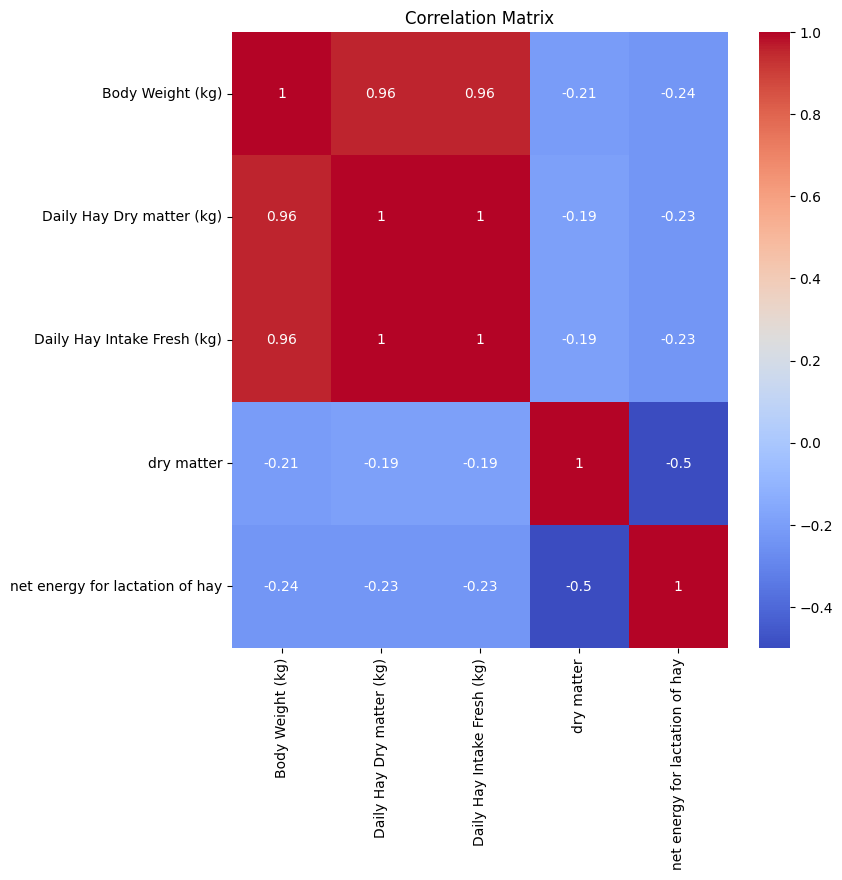

In [38]:
plt.figure(figsize=(8, 8))
sns.heatmap(numerical_angus.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()